<a href="https://colab.research.google.com/github/Vukhmt02/naive-bayes-project/blob/main/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [2]:
! pip install --quiet vietocr

# Inference

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [7]:
config = Cfg.load_config_from_name('vgg_transformer')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [19]:
config = Cfg.load_config_from_name('vgg_transformer')
# config['weights'] = './weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'

In [9]:
detector = Predictor(config)

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
18533it [00:44, 412.53it/s]


In [10]:
! wget https://vocr.vn/data/vietocr/sample.zip
! unzip  -qq -o sample.zip

--2026-01-11 15:06:41--  https://vocr.vn/data/vietocr/sample.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305969 (299K) [application/zip]
Saving to: ‘sample.zip’

sample.zip          100%[===================>] 298.80K  87.8KB/s    in 3.4s    

2026-01-11 15:07:37 (87.8 KB/s) - ‘sample.zip’ saved [305969/305969]



In [12]:
! ls sample | shuf |head -n 5

034097001515.jpeg
077078001025.jpeg
6613.jpg
026087002892.jpeg
deskewed-2019_09_28_051998_201909281423187_11.jpg


'VŨ THUỲ NINH'

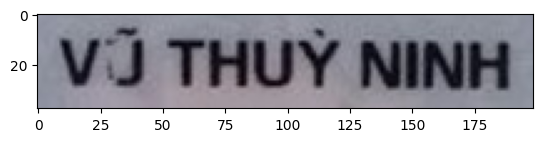

In [13]:
img = './sample/031189003299.jpeg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

# Download sample dataset

In [14]:
! wget https://vocr.vn/data/vietocr/data_line.zip

--2026-01-11 15:07:53--  https://vocr.vn/data/vietocr/data_line.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61212284 (58M) [application/zip]
Saving to: ‘data_line.zip’

data_line.zip       100%[===================>]  58.38M  1.42MB/s    in 20s     

2026-01-11 15:08:21 (2.93 MB/s) - ‘data_line.zip’ saved [61212284/61212284]



In [15]:
! unzip -qq -o ./data_line.zip

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [15]:
!pip install numpy==1.26.4
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [3]:
config = Cfg.load_config_from_name('vgg_transformer')

In [5]:

dataset_params = {
    'name':'hw',
    'data_root':'./data_line/',
    'train_annotation':'train_line_annotation.txt',
    'valid_annotation':'test_line_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':20000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

you can change any of these params in this full list below

In [6]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 20000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'hw',
  'data_root': './data_line/',
  'train_annotation': 'train_line_annotation.txt',
  'valid_annotation': 'test_line_annotation.txt',
  'image_height': 32,
  'image_min_width': 32

You should train model from our pretrained

In [7]:
trainer = Trainer(config, pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


100%|██████████| 548M/548M [00:06<00:00, 82.7MB/s]
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Model weight /tmp/vgg_transformer.pth exsits. Ignore download!


Create train_hw: 100%|████████████████████████████████████████| 5483/5483 [00:03<00:00, 1557.74it/s]

Created dataset with 5482 samples



train_hw build cluster: 100%|███████████████████████████████| 5482/5482 [00:00<00:00, 146443.08it/s]
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Create valid_hw: 100%|████████████████████████████████████████| 1813/1813 [00:01<00:00, 1711.40it/s]

Created dataset with 1812 samples



valid_hw build cluster: 100%|███████████████████████████████| 1812/1812 [00:00<00:00, 132590.35it/s]


Save model configuration for inference, load_config_from_file

In [9]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

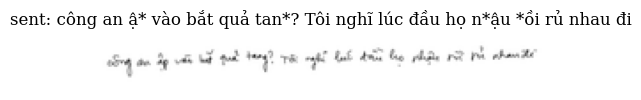

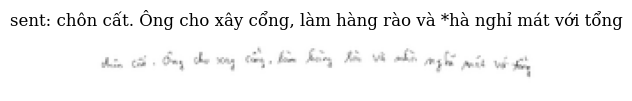

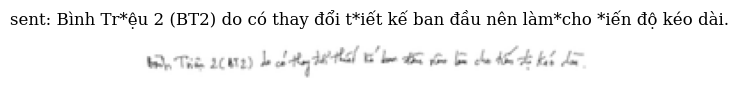

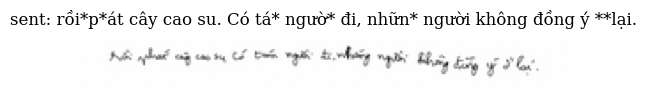

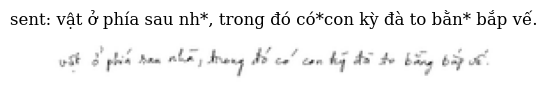

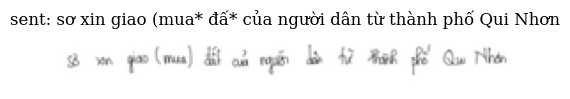

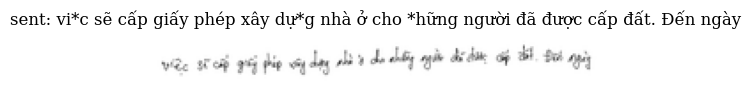

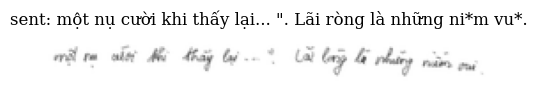

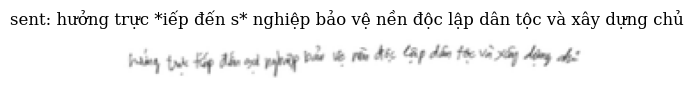

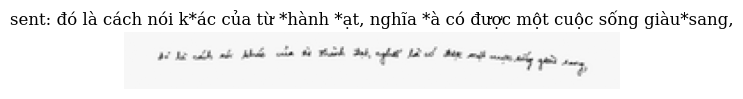

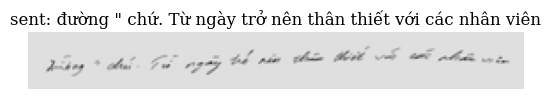

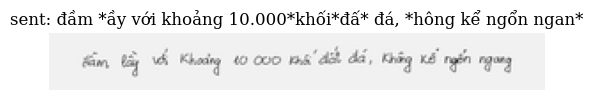

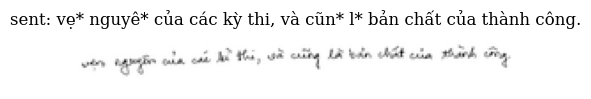

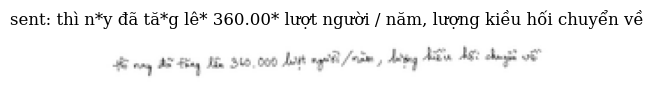

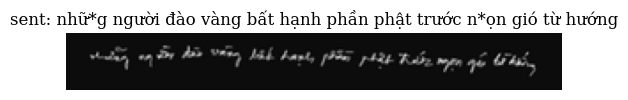

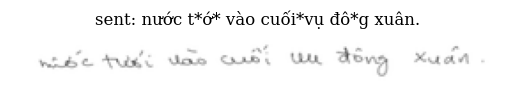

In [10]:
trainer.visualize_dataset()

Train now

In [19]:
trainer.config['trainer']['iters'] = trainer.config['trainer']['iters'] + 1
trainer.train()

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


ValueError: Tried to step 20007 times. The specified number of total steps is 20000

Visualize prediction from our trained model


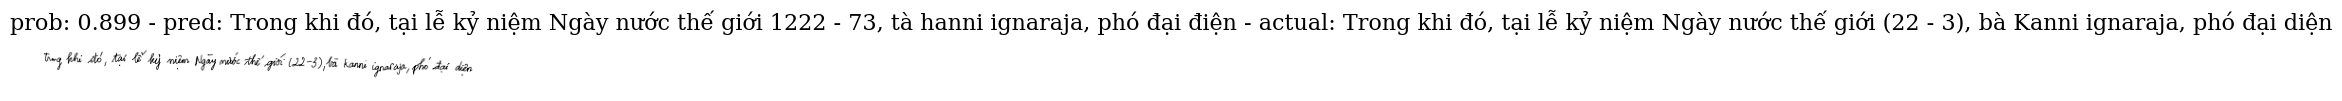

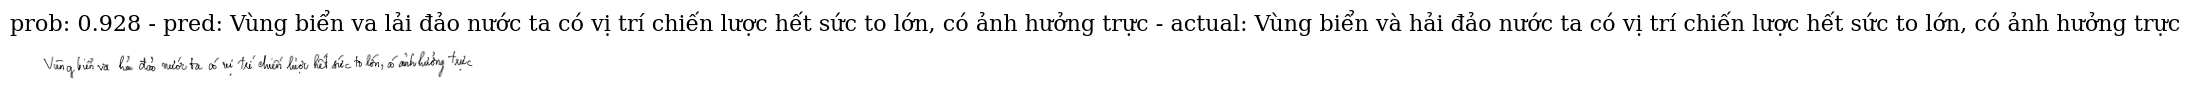

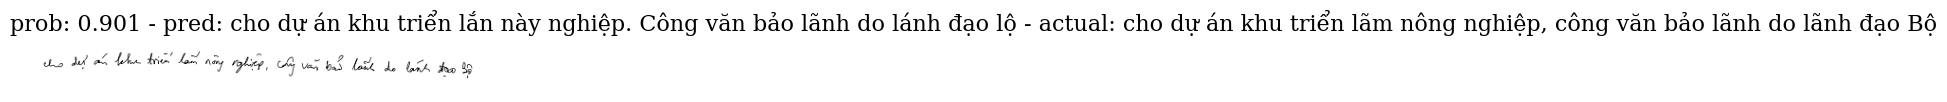

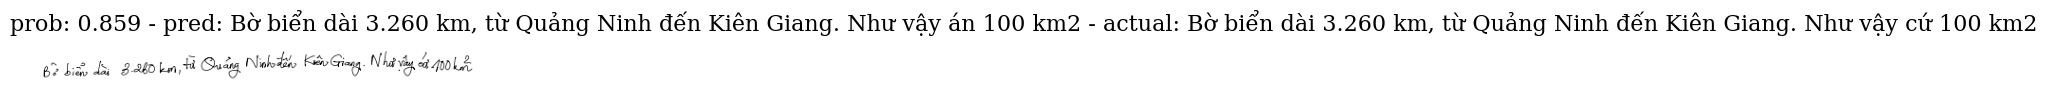

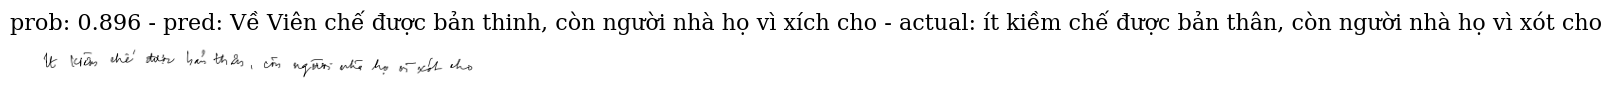

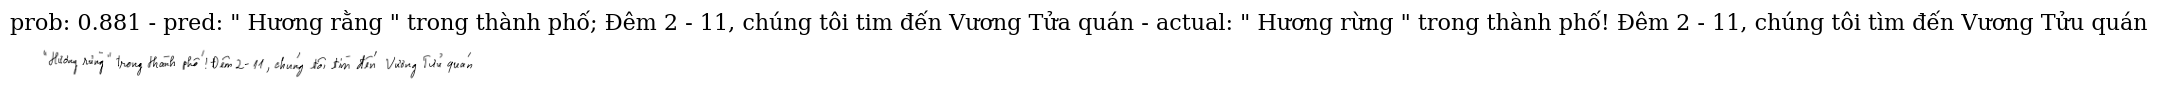

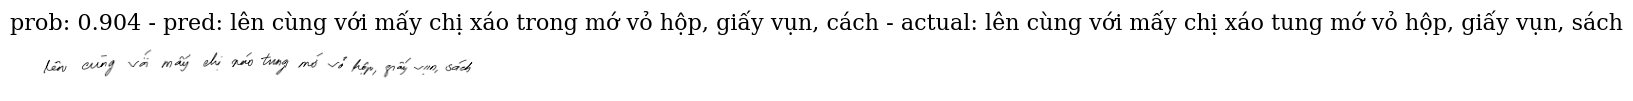

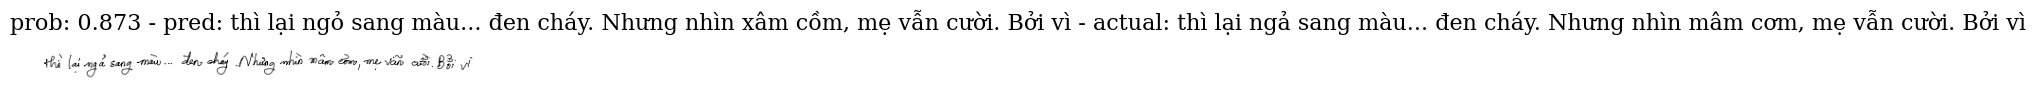

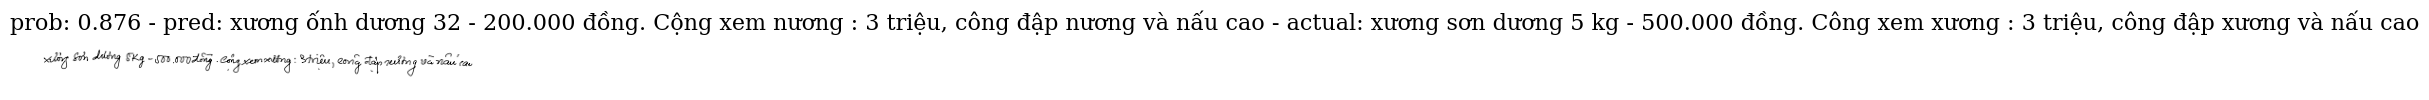

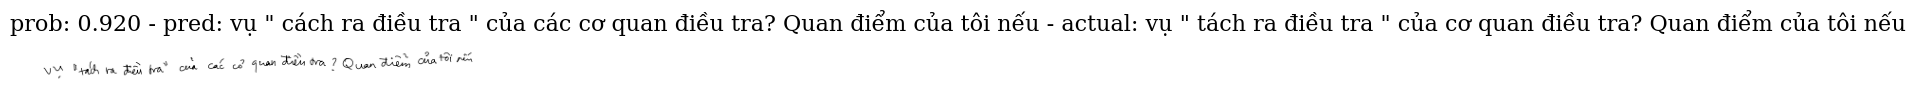

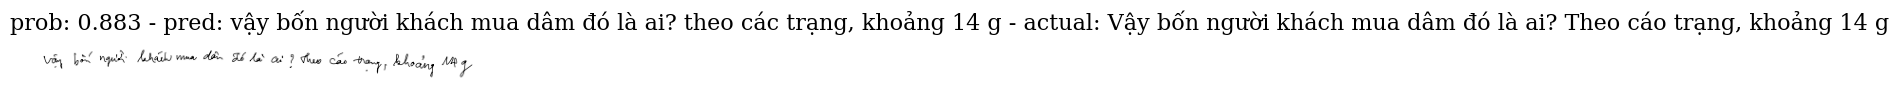

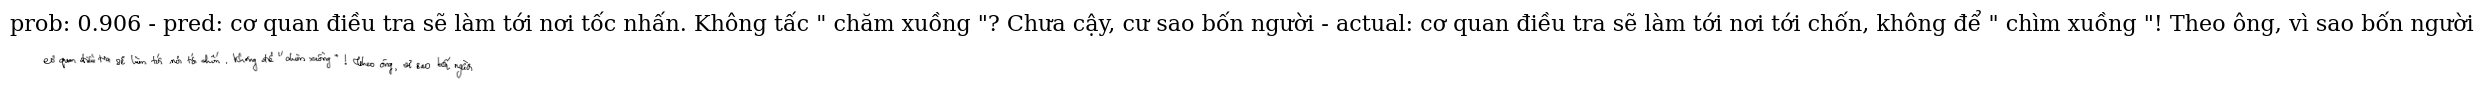

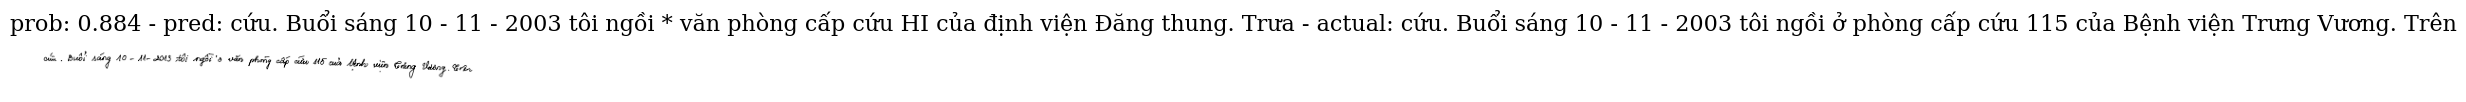

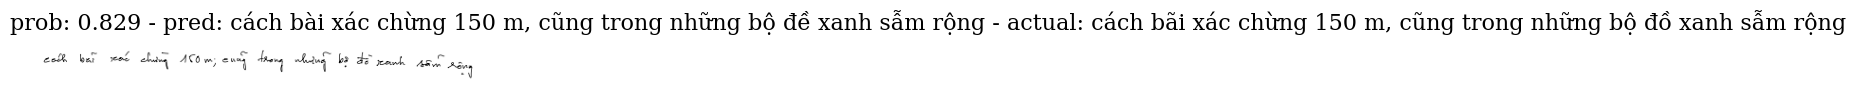

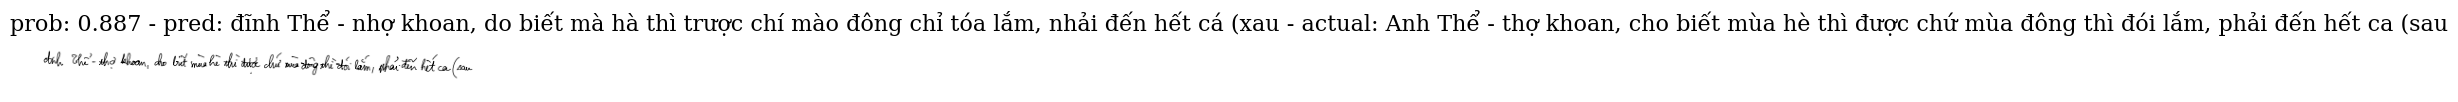

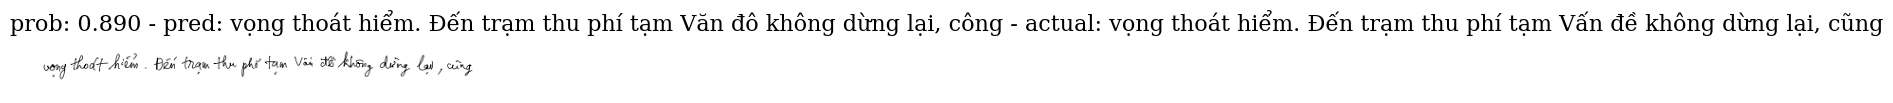

In [20]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [22]:
from PIL import Image

# 1. Đường dẫn tới file ảnh bạn vừa tải lên
img_path = '20140603_0003_BCCTC_tg_0_1.png'

# 2. Mở ảnh
img = Image.open(img_path)

# 3. Sử dụng mô hình đã train để dự đoán
# Lưu ý: 'trainer.detector' là bộ dự đoán đã được nạp trọng số từ quá trình train của bạn
prediction = trainer.detector.predict(img)

# 4. Hiển thị kết quả
print("Nội dung AI đọc được là:", prediction)
img.show()

AttributeError: 'Trainer' object has no attribute 'detector'

Model weight /tmp/vgg_transformer.pth exsits. Ignore download!
Nội dung AI đọc được: Bản chết của thành công


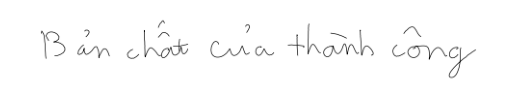

In [25]:
from PIL import Image
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
import matplotlib.pyplot as plt # Thêm dòng này để hiển thị ảnh

# 1. Load config
# Đảm bảo config.yml đã được lưu từ quá trình trainer.config.save('config.yml')
config = Cfg.load_config_from_file('config.yml')

# 2. Chỉ ra đường dẫn đến file model đã được train
# Vì quá trình train của bạn có thể chưa hoàn thành, chúng ta sẽ dùng model pretrained mặc định
config['weights'] = config['pretrain'] # Sử dụng URL của model pretrained

# 3. Loại bỏ dòng gây lỗi 'TypeError' từ cấu hình cnn
# config['cnn']['checkpoint'] = None # Dòng này gây ra lỗi, không cần thiết

# Thiết lập thiết bị sử dụng (GPU nếu có)
config['device'] = 'cuda:0'

# 4. Tạo object dự đoán
detector = Predictor(config)

# 5. Đường dẫn ảnh cần OCR
# Sử dụng một ảnh mẫu đã được tải xuống trước đó
img_path = '20140603_0003_BCCTC_tg_0_0.png'

# 6. Mở ảnh
img = Image.open(img_path)

# 7. Predict
prediction = detector.predict(img)

# 8. In kết quả
print("Nội dung AI đọc được:", prediction)

# 9. Hiển thị ảnh
plt.imshow(img)
plt.axis('off')
plt.show()

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
trainer.precision()

(0.08522727272727272, 0.6512922)